# Water Quality Analysis using Python and Data Science


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [4]:

df = pd.read_csv('water_potability.csv')


df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Data Preprocessing

In [6]:

print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)
X = df.drop(columns=['Potability'])
y = df['Potability']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


## Exploratory Data Analysis

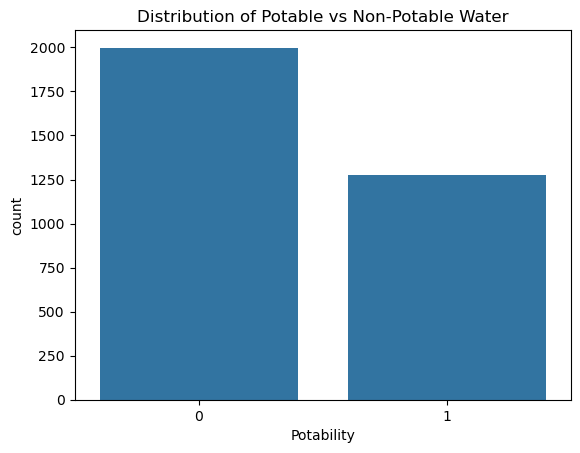

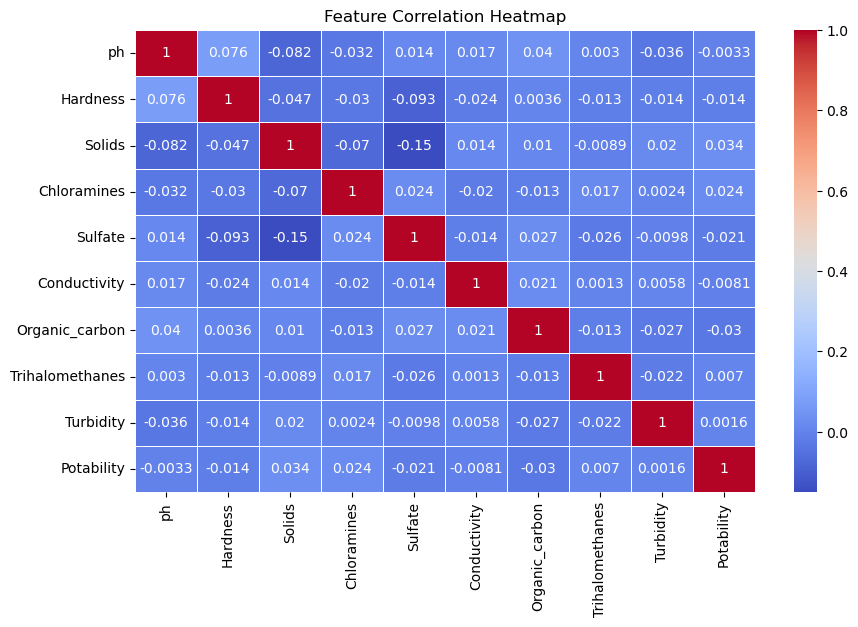

In [8]:
sns.countplot(x=y)
plt.title('Distribution of Potable vs Non-Potable Water')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Machine Learning Model


In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('precision Score:', precision_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 0.676829268292683
precision Score: 0.7230769230769231
Confusion Matrix:
 [[175  18]
 [ 88  47]]


In [11]:
from sklearn.svm import SVC
model1 = SVC()



model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
print('Accuracy Score:', accuracy_score(y_test, y_pred1))
print('precision Score:', precision_score(y_test, y_pred1))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred1))

Accuracy Score: 0.6859756097560976
precision Score: 0.8478260869565217
Confusion Matrix:
 [[186   7]
 [ 96  39]]


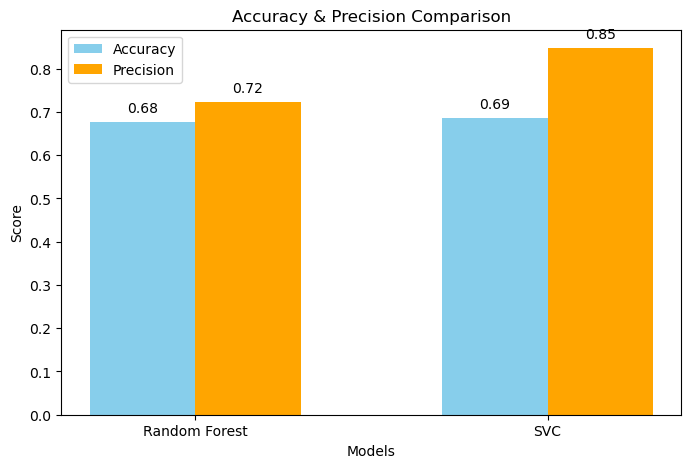

In [12]:
import matplotlib.pyplot as plt
import numpy as np


models = ["Random Forest", "SVC"]
accuracy_scores = [accuracy1, accuracy]
precision_scores = [precision2, precision]  

x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, accuracy_scores, width, label="Accuracy", color="skyblue")
bars2 = ax.bar(x + width/2, precision_scores, width, label="Precision", color="orange")

ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Accuracy & Precision Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 5), 
                    textcoords="offset points", 
                    ha='center', va='bottom')


plt.show()


In [13]:
print("Enter the following values for testing:")
sample_data = {
    'ph': float(input("pH (e.g., 7.0): ")),
    'Hardness': float(input("Hardness (mg/L) (e.g., 150.0): ")),
    'Solids': float(input("Total Solids (mg/L) (e.g., 20000.0): ")),
    'Chloramines': float(input("Chloramines (mg/L) (e.g., 7.0): ")),
    'Sulfate': float(input("Sulfate (mg/L) (e.g., 300.0): ")),
    'Conductivity': float(input("Conductivity (µS/cm) (e.g., 400.0): ")),
    'Organic_carbon': float(input("Organic Carbon (mg/L) (e.g., 20.0): ")),
    'Trihalomethanes': float(input("Trihalomethanes (µg/L) (e.g., 70.0): ")),
    'Turbidity': float(input("Turbidity (NTU) (e.g., 4.0): "))
}


limits = {
    'Parameter': ['pH', 'Hardness (mg/L)', 'Total Solids (mg/L)', 'Chloramines (mg/L)', 'Sulfate (mg/L)',
                  'Conductivity (µS/cm)', 'Organic Carbon (mg/L)', 'Trihalomethanes (µg/L)', 'Turbidity (NTU)'],
    'Your Value': [sample_data['ph'], sample_data['Hardness'], sample_data['Solids'], sample_data['Chloramines'],
                   sample_data['Sulfate'], sample_data['Conductivity'], sample_data['Organic_carbon'],
                   sample_data['Trihalomethanes'], sample_data['Turbidity']],
    'WHO/EPA/BIS Limit': ['6.5 - 8.5', '300 (BIS)', '300 - 600 (BIS)', '4.0 (EPA)', '250 (EPA)',
                          '1000 (EPA)', '2 - 4 (WHO)', '80 (EPA)', '1 - 5 (WHO)'],
    'Safe?': [
        '✅ Yes' if 6.5 <= sample_data['ph'] <= 8.5 else '❌ No',
        '✅ Yes' if sample_data['Hardness'] <= 300 else '❌ No',
        '✅ Yes' if 300 <= sample_data['Solids'] <= 600 else '❌ No',
        '✅ Yes' if sample_data['Chloramines'] <= 4 else '❌ No',
        '✅ Yes' if sample_data['Sulfate'] <= 250 else '❌ No',
        '✅ Yes' if sample_data['Conductivity'] <= 1000 else '❌ No',
        '✅ Yes' if 2 <= sample_data['Organic_carbon'] <= 4 else '❌ No',
        '✅ Yes' if sample_data['Trihalomethanes'] <= 80 else '❌ No',
        '✅ Yes' if 1 <= sample_data['Turbidity'] <= 5 else '❌ No'
    ]
}
limits_df = pd.DataFrame(limits)


print("\nWater Quality Test Results:")
from IPython.display import display
display(limits_df)


unsafe_params = limits_df[limits_df['Safe?'].str.contains('❌')]
if not unsafe_params.empty:
    print("\n🚨 Unsafe Parameters Detected:")
    display(unsafe_params)
else:
    print("\n✅ All parameters are within safe limits.")

sample_df = pd.DataFrame([sample_data])
sample_scaled = scaler.transform(sample_df)
sample_prediction = model1.predict(sample_scaled)
if sample_prediction[0] == 1:
    print("\nFinal Prediction: The water is Potable (Safe).")
else:
    print("\nFinal Prediction: The water is Non-Potable (Unsafe).")

Enter the following values for testing:


pH (e.g., 7.0):  


ValueError: could not convert string to float: ''

In [ ]:
import joblib
joblib.dump(model, "model.pkl") 

In [32]:
loaded_model = joblib.load("model.pkl")

# Make a test prediction
sample_input = X_test[0].reshape(1, -1)  
prediction = loaded_model.predict(sample_input)
print("Test Prediction:", prediction)

Test Prediction: [0]
